# Загрузка и установка приколов

In [ ]:
!kaggle competitions download -c urfuaieng2022clf2
!pip install catboost
!pip install patool
!pip install optuna
!pip install lazypredict

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 5.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import patoolib

import numpy as np
import pandas as pd
import datetime
import re

from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from catboost import CatBoostRegressor
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from lazypredict.Supervised import LazyRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,classification_report
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
import lazypredict
from sklearn.model_selection import cross_validate
import joblib
from sklearn.svm import LinearSVC
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, average_precision_score
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, roc_auc_score, classification_report, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
import joblib



import matplotlib.pyplot as plt
import seaborn as sns

from statistics import mean

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

%matplotlib inline

## Загрузка данных

In [ ]:
patoolib.extract_archive('/content/urfuaieng2022clf2.zip')

patool: Extracting /content/urfuaieng2022clf2.zip ...
patool: running /usr/bin/7z x -o./Unpack_f8fvmecq -- /content/urfuaieng2022clf2.zip
patool: ... /content/urfuaieng2022clf2.zip extracted to `urfuaieng2022clf2' (multiple files in root).


'urfuaieng2022clf2'

In [ ]:
train_who = pd.read_csv("/content/urfuaieng2022clf2/Train_Who.csv") 
train_target = pd.read_csv("/content/urfuaieng2022clf2/Train_Target_clf.csv") 
assessments = pd.read_csv("/content/urfuaieng2022clf2/assessments.csv") 
courses = pd.read_csv('/content/urfuaieng2022clf2/courses.csv') 
student_info = pd.read_csv("/content/urfuaieng2022clf2/studentInfo.csv") 
student_registration = pd.read_csv("/content/urfuaieng2022clf2/studentRegistration.csv") 
student_vle = pd.read_csv("/content/urfuaieng2022clf2/studentVle.csv")
vle = pd.read_csv("/content/urfuaieng2022clf2/vle.csv")
test_who = pd.read_csv("/content/urfuaieng2022clf2/Test_Who.csv")





# Анализ исходных таблиц

## train_who

In [ ]:
train_who.head()

,ID,id_student,code_module,code_presentation
0,0,464685,DDD,2014B
1,1,606593,DDD,2013J
2,2,1674799,CCC,2014J
3,3,195246,FFF,2014J
4,4,582080,FFF,2013J


In [ ]:
train_who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 26074 non-null  int64 
 1   id_student         26074 non-null  int64 
 2   code_module        26074 non-null  object
 3   code_presentation  26074 non-null  object
dtypes: int64(2), object(2)
memory usage: 814.9+ KB


In [ ]:
train_who.duplicated().value_counts()

False    26074
dtype: int64

Приколов не обнаружено, двигаемся дальше

## train_target

In [ ]:
train_target.head()

,ID,final_result
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0


In [ ]:
train_target.info(), train_target.duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            26074 non-null  int64
 1   final_result  26074 non-null  int64
dtypes: int64(2)
memory usage: 407.5 KB


(None,
 False    26074
 dtype: int64)

Аналогично

## assessments

In [ ]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.00,10.00
1,AAA,2013J,1753,TMA,54.00,20.00
2,AAA,2013J,1754,TMA,117.00,20.00
3,AAA,2013J,1755,TMA,166.00,20.00
4,AAA,2013J,1756,TMA,215.00,30.00


In [ ]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


Не досчитались дат, смотрим

In [ ]:
assessments[assessments.date.isnull()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.00
11,AAA,2014J,1763,Exam,NaN,100.00
23,BBB,2013B,14990,Exam,NaN,100.00
35,BBB,2013J,15002,Exam,NaN,100.00
47,BBB,2014B,15014,Exam,NaN,100.00
53,BBB,2014J,15025,Exam,NaN,100.00
62,CCC,2014B,24290,Exam,NaN,100.00
63,CCC,2014B,40087,Exam,NaN,100.00
72,CCC,2014J,24299,Exam,NaN,100.00
73,CCC,2014J,40088,Exam,NaN,100.00


Пока не понятно, что с этим делать

## courses

In [ ]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [ ]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


## student_info

In [ ]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N


In [ ]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


Видны пропуски в imd_band, айда заполнять

### Заполнение пропусков imd_band

In [ ]:
student_info_nans = student_info[['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'age_band', 'imd_band', 'id_student']]
student_info_nans = student_info_nans[student_info_nans.imd_band.isnull()]
student_info_nans  # создаем датафрейм в которых imd_band == NaN

,code_module,code_presentation,gender,region,highest_education,age_band,imd_band,id_student
9,AAA,2013J,M,North Region,Post Graduate Qualification,55<=,NaN,53025
17,AAA,2013J,M,Ireland,HE Qualification,35-55,NaN,71361
28,AAA,2013J,M,Ireland,Post Graduate Qualification,35-55,NaN,104476
34,AAA,2013J,F,North Region,Post Graduate Qualification,35-55,NaN,114017
65,AAA,2013J,M,Ireland,HE Qualification,35-55,NaN,172112
...,...,...,...,...,...,...,...,...
30552,GGG,2013J,M,North Region,Lower Than A Level,0-35,NaN,589914
31170,GGG,2014B,F,North Western Region,Lower Than A Level,0-35,NaN,575199
31389,GGG,2014B,F,South West Region,Lower Than A Level,0-35,NaN,617889
31777,GGG,2014B,F,South Region,A Level or Equivalent,0-35,NaN,634470


In [ ]:
student_info_without_nans = student_info[['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'age_band', 'imd_band', 'id_student']].dropna()
student_info_without_nans #Создаем датафрейм без нанов, из которого будем извлекать информацию для заполнения

,code_module,code_presentation,gender,region,highest_education,age_band,imd_band,id_student
0,AAA,2013J,M,East Anglian Region,HE Qualification,55<=,90-100%,11391
1,AAA,2013J,F,Scotland,HE Qualification,35-55,20-30%,28400
2,AAA,2013J,F,North Western Region,A Level or Equivalent,35-55,30-40%,30268
3,AAA,2013J,F,South East Region,A Level or Equivalent,35-55,50-60%,31604
4,AAA,2013J,F,West Midlands Region,Lower Than A Level,0-35,50-60%,32885
...,...,...,...,...,...,...,...,...
32588,GGG,2014J,F,Wales,Lower Than A Level,0-35,10-20,2640965
32589,GGG,2014J,F,East Anglian Region,Lower Than A Level,35-55,40-50%,2645731
32590,GGG,2014J,F,South Region,A Level or Equivalent,0-35,20-30%,2648187
32591,GGG,2014J,F,South East Region,Lower Than A Level,35-55,90-100%,2679821


Принцип следующий: берем кортеж, в котором есть NaN, ищем такой же в таблице, где imd_band заполнен

In [ ]:
student_info_nans.iloc[1]

code_module                       AAA
code_presentation               2013J
gender                              M
region                        Ireland
highest_education    HE Qualification
age_band                        35-55
imd_band                          NaN
id_student                      71361
Name: 17, dtype: object

In [ ]:
student_info_without_nans[(student_info_without_nans.code_module == student_info_nans.iloc[1][0])
                          & (student_info_without_nans.code_presentation == student_info_nans.iloc[1][1])
                          & (student_info_without_nans.gender == student_info_nans.iloc[1][2])
                          & (student_info_without_nans.region == student_info_nans.iloc[1][3])
                          & (student_info_without_nans.highest_education == student_info_nans.iloc[1][4])
                          & (student_info_without_nans.age_band == student_info_nans.iloc[1][5])]

,code_module,code_presentation,gender,region,highest_education,age_band,imd_band,id_student
164,AAA,2013J,M,Ireland,HE Qualification,35-55,70-80%,343446


In [ ]:
def get_neighbor(series,id): #Функция для автоматизации, которая возвращаем series с imd_band или без него(необходимо будет обработать IndexError)
  return student_info_without_nans[(student_info_without_nans.code_module == series.iloc[id][0])
                          & (student_info_without_nans.code_presentation == series.iloc[id][1])
                          & (student_info_without_nans.gender == series.iloc[id][2])
                          & (student_info_without_nans.region == series.iloc[id][3])
                          & (student_info_without_nans.highest_education == series.iloc[id][4])
                          & (student_info_without_nans.age_band == series.iloc[id][5])].imd_band
            


In [ ]:
for i in range(student_info_nans.shape[0]):
  try:
     student_info_nans.iat[i,6] = get_neighbor(student_info_nans,i).values[0]
  except IndexError:
    continue #Если в найденном кортеже нет значения imd_band, пропускаем и идём дальше

In [ ]:
student_info_nans[student_info_nans.imd_band.isnull()]

,code_module,code_presentation,gender,region,highest_education,age_band,imd_band,id_student
9,AAA,2013J,M,North Region,Post Graduate Qualification,55<=,NaN,53025
28,AAA,2013J,M,Ireland,Post Graduate Qualification,35-55,NaN,104476
34,AAA,2013J,F,North Region,Post Graduate Qualification,35-55,NaN,114017
66,AAA,2013J,F,Ireland,A Level or Equivalent,35-55,NaN,172797
68,AAA,2013J,M,North Region,HE Qualification,35-55,NaN,175392
...,...,...,...,...,...,...,...,...
28360,FFF,2014J,M,Ireland,Post Graduate Qualification,0-35,NaN,598308
28370,FFF,2014J,M,North Region,Post Graduate Qualification,35-55,NaN,600071
29724,FFF,2014J,F,Ireland,HE Qualification,0-35,NaN,693345
29766,FFF,2014J,M,North Region,HE Qualification,35-55,NaN,695449


1111 - 242 = 869 заполнили дофига значений точными значениями, неплохо!

Вставляем заполненные строки в исходный датафрейм

In [ ]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [ ]:
student_info.loc[student_info.id_student.isin(student_info_nans.id_student), ['imd_band']] = student_info_nans[['imd_band']]

In [ ]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32351 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


пересоздаем student_info_nans для дальнейшего заполнения пропусков

In [ ]:
student_info_nans = student_info[['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'age_band', 'imd_band', 'id_student']]
student_info_nans = student_info_nans[student_info_nans.imd_band.isnull()]
student_info_nans  # создаем датафрейм в которых imd_band == NaN

,code_module,code_presentation,gender,region,highest_education,age_band,imd_band,id_student
9,AAA,2013J,M,North Region,Post Graduate Qualification,55<=,NaN,53025
28,AAA,2013J,M,Ireland,Post Graduate Qualification,35-55,NaN,104476
34,AAA,2013J,F,North Region,Post Graduate Qualification,35-55,NaN,114017
66,AAA,2013J,F,Ireland,A Level or Equivalent,35-55,NaN,172797
68,AAA,2013J,M,North Region,HE Qualification,35-55,NaN,175392
...,...,...,...,...,...,...,...,...
28360,FFF,2014J,M,Ireland,Post Graduate Qualification,0-35,NaN,598308
28370,FFF,2014J,M,North Region,Post Graduate Qualification,35-55,NaN,600071
29724,FFF,2014J,F,Ireland,HE Qualification,0-35,NaN,693345
29766,FFF,2014J,M,North Region,HE Qualification,35-55,NaN,695449


считаем статистику для более точного заполнения

In [ ]:
list_of_regions = []
for i in range(student_info_nans.shape[0]):
  list_of_regions.append(student_info_nans.iloc[i].region + ' ' + student_info_nans.iloc[i].age_band)
list_of_regions = set(list_of_regions)

In [ ]:
list_of_regions

{'Ireland 0-35',
 'Ireland 35-55',
 'North Region 0-35',
 'North Region 35-55',
 'North Region 55<='}

In [ ]:
student_info[(student_info.region =='Ireland') & (student_info.age_band == '0-35')].imd_band.mode()[0]

'0-10%'

In [ ]:
for i in range(student_info_nans.shape[0]):
   if student_info_nans.iloc[i].region == 'Ireland' and student_info_nans.iloc[i].age_band == '0-35':
     student_info_nans.iat[i,6] = student_info[(student_info.region =='Ireland') & (student_info.age_band == '0-35')].imd_band.mode()[0]
student_info_nans[student_info_nans.imd_band.isnull()].shape[0]

207

In [ ]:
student_info[(student_info.region =='Ireland') & (student_info.age_band == '35-55')].imd_band.mode()[0]

'30-40%'

In [ ]:
for i in range(student_info_nans.shape[0]):
   if student_info_nans.iloc[i].region == 'Ireland' and student_info_nans.iloc[i].age_band == '35-55':
     student_info_nans.iat[i,6] = student_info[(student_info.region =='Ireland') & (student_info.age_band == '35-55')].imd_band.mode()[0]
student_info_nans[student_info_nans.imd_band.isnull()].shape[0]

172

In [ ]:
student_info[(student_info.region =='North Region') & (student_info.age_band == '0-35')].imd_band.mode()[0]

'10-20'

In [ ]:
for i in range(student_info_nans.shape[0]):
   if student_info_nans.iloc[i].region == 'North Region' and student_info_nans.iloc[i].age_band == '0-35':
     student_info_nans.iat[i,6] = student_info[(student_info.region =='North Region') & (student_info.age_band == '0-35')].imd_band.mode()[0]
student_info_nans[student_info_nans.imd_band.isnull()].shape[0]

103

In [ ]:
student_info[(student_info.region =='North Region') & (student_info.age_band == '35-55')].imd_band.mode()[0]

'10-20'

In [ ]:
for i in range(student_info_nans.shape[0]):
   if student_info_nans.iloc[i].region == 'North Region' and student_info_nans.iloc[i].age_band == '35-55':
     student_info_nans.iat[i,6] = student_info[(student_info.region =='North Region') & (student_info.age_band == '35-55')].imd_band.mode()[0]
student_info_nans[student_info_nans.imd_band.isnull()].shape[0]

15

In [ ]:
student_info_nans[student_info_nans.imd_band.isnull()].shape[0]

15

In [ ]:
student_info[(student_info.region =='North Region') & (student_info.age_band == '55<=')]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N
223,AAA,2013J,603861,M,North Region,HE Qualification,NaN,55<=,0,60,N
619,AAA,2014J,603861,M,North Region,HE Qualification,NaN,55<=,1,60,N
8954,CCC,2014B,383347,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N
10010,CCC,2014B,622302,M,North Region,Post Graduate Qualification,NaN,55<=,0,30,N
10431,CCC,2014B,1937511,F,North Region,HE Qualification,NaN,55<=,0,150,N
11985,CCC,2014J,628034,F,North Region,HE Qualification,NaN,55<=,0,60,N
12916,CCC,2014J,1937511,F,North Region,HE Qualification,NaN,55<=,1,270,N
13321,DDD,2013B,347210,M,North Region,HE Qualification,NaN,55<=,0,90,N
13367,DDD,2013B,383347,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N


анлак, значений в исходном датафрейме нет даже для анализа, поэтому берем ближайшее по возрасту - 35-55 : '10-20'

In [ ]:
for i in range(student_info_nans.shape[0]):
   if student_info_nans.iloc[i].region == 'North Region' and student_info_nans.iloc[i].age_band == '55<=':
     student_info_nans.iat[i,6] = student_info[(student_info.region =='North Region') & (student_info.age_band == '35-55')].imd_band.mode()[0]
student_info_nans[student_info_nans.imd_band.isnull()].shape[0]

0

Пропуски побеждены, го вставлять в исходную

In [ ]:
student_info_nans[student_info_nans.imd_band.isnull()]

,code_module,code_presentation,gender,region,highest_education,age_band,imd_band,id_student


In [ ]:
student_info.loc[student_info.id_student.isin(student_info_nans.id_student), ['imd_band']] = student_info_nans[['imd_band']]
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32581 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [ ]:
student_info[student_info.imd_band.isnull()]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
9527,CCC,2014B,575745,F,North Region,HE Qualification,NaN,35-55,0,130,N
10508,CCC,2014B,2418732,F,North Region,HE Qualification,NaN,35-55,0,60,N
10691,CCC,2014J,185057,M,Ireland,HE Qualification,NaN,35-55,0,90,N
10727,CCC,2014J,259641,M,North Region,A Level or Equivalent,NaN,35-55,0,120,N
11719,CCC,2014J,601735,M,North Region,Lower Than A Level,NaN,35-55,0,60,N
12638,CCC,2014J,686058,F,North Region,Lower Than A Level,NaN,35-55,0,120,N
12932,CCC,2014J,2026585,M,Ireland,HE Qualification,NaN,35-55,0,60,N
13686,DDD,2013B,516398,M,North Region,HE Qualification,NaN,35-55,0,60,N
16356,DDD,2014B,84605,M,North Region,A Level or Equivalent,NaN,35-55,1,120,N
23303,FFF,2013B,543785,M,North Region,Lower Than A Level,NaN,0-35,0,90,N


Осталось 12 значений, добьем вручную

In [ ]:
def get_imd_band_mode(series,id):
  list_with_values = student_info.iloc[id].values
  return student_info[(student_info.code_module == list_with_values[0])
                          & (student_info.code_presentation == list_with_values[1])
                          & (student_info.gender == list_with_values[3])
                          & (student_info.region == list_with_values[4])
                          & (student_info.highest_education == list_with_values[5])].imd_band.mode()

Добить вручную

In [ ]:
list_of_lasts_nans = student_info[student_info.imd_band.isnull()].index
list_of_lasts_nans

Int64Index([ 9527, 10508, 10691, 10727, 11719, 12638, 12932, 13686, 16356,
            23303, 27992, 29907],
           dtype='int64')

In [ ]:
get_imd_band_mode(student_info,9527)[0]

'20-30%'

In [ ]:
for id in list_of_lasts_nans:
  try:
     student_info.iat[id,6] = get_imd_band_mode(student_info,id)[0]
  except IndexError:
    continue

In [ ]:
student_info[student_info.imd_band.isnull()]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability


Наны в student_info побеждены

## student_registration

In [ ]:
student_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        32593 non-null  object 
 1   code_presentation  32593 non-null  object 
 2   id_student         32593 non-null  int64  
 3   date_registration  32548 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1018.7+ KB


Присутствуют пропуски, посмотрим, можно ли их дропнуть(есть ли наны среди тех, что представлены в тестовой выборке)

In [ ]:
index_is_null = student_registration[student_registration.date_registration.isnull()].index # вычисляем индексы строк, где date_registration == null
index_is_null

Int64Index([ 2344,  2538,  2759,  5356,  5490,  5573,  6295,  6305,  8307,
             8975,  9523,  9811,  9853, 10388, 11249, 12545, 12893, 13135,
            13503, 14392, 14393, 14556, 14876, 15214, 15968, 16092, 16862,
            16911, 17559, 18249, 18433, 19362, 19773, 20413, 22335, 23796,
            23818, 25790, 26333, 26576, 26803, 26904, 27550, 29974, 30058],
           dtype='int64')

In [ ]:
student_registration.iloc[index_is_null[0]]

code_module             BBB
code_presentation     2013B
id_student           630346
date_registration       NaN
Name: 2344, dtype: object

In [ ]:
def get_student_registration_neighbor_mean(i):
  return np.ceil( #округляем
      student_registration #Обращаемся к таблице student_registration
       [(student_registration.code_module == student_registration.iloc[index_is_null[i]][0]) # вычисляем строки где code_module равен значению, которое есть в передаваемом аргументе series
       & (student_registration.code_presentation == student_registration.iloc[index_is_null[i]][1])] # вычисляем строки где code_presentation равен значению, которое есть в передаваемом аргументе series
       .date_registration # берем date_registration
       .mean()) #берем среднее

In [ ]:
get_student_registration_neighbor_mean(2)

-69.0

In [ ]:
for i in range(len(index_is_null)):
  student_registration.iat[index_is_null[i], 3] = get_student_registration_neighbor_mean(i)

In [ ]:
student_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        32593 non-null  object 
 1   code_presentation  32593 non-null  object 
 2   id_student         32593 non-null  int64  
 3   date_registration  32593 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1018.7+ KB


Наны в student_registration побеждены

# Собираем датафрейм, который будем подавать на обучение

In [ ]:
train = train_who.merge(student_info, on=['id_student','code_module', 'code_presentation'], how = 'inner')
test = test_who.merge(student_info, on=['id_student','code_module', 'code_presentation'], how = 'inner')

train = train.merge(courses, on=['code_module', 'code_presentation'], how = 'left')
test = test.merge(courses, on=['code_module', 'code_presentation'], how = 'left')

train = train.merge(student_registration, on=['code_module', 'code_presentation', 'id_student'], how = 'inner')
test = test.merge(student_registration, on=['code_module', 'code_presentation', 'id_student'], how = 'inner')

In [ ]:
test

,ID,id_student,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,module_presentation_length,date_registration
0,26074,2588655,DDD,2014J,M,Scotland,Lower Than A Level,50-60%,0-35,2,60,N,262,-92.00
1,26075,543628,CCC,2014B,M,North Western Region,HE Qualification,0-10%,35-55,0,90,N,241,-109.00
2,26076,387276,BBB,2013B,F,North Western Region,Lower Than A Level,50-60%,35-55,1,180,N,240,-88.00
3,26077,692219,CCC,2014J,M,South Region,A Level or Equivalent,20-30%,0-35,0,90,N,269,-34.00
4,26078,516212,BBB,2013J,F,East Midlands Region,A Level or Equivalent,20-30%,0-35,0,60,N,268,-134.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,32588,230510,DDD,2013J,M,South Region,Lower Than A Level,10-20,0-35,0,60,Y,261,-54.00
6515,32589,384026,DDD,2013B,F,Yorkshire Region,A Level or Equivalent,30-40%,0-35,1,120,N,240,-34.00
6516,32590,2367155,AAA,2013J,F,East Anglian Region,A Level or Equivalent,80-90%,0-35,0,120,N,268,-22.00
6517,32591,501444,FFF,2014J,M,South Region,Lower Than A Level,10-20,0-35,0,60,N,269,-59.00


Для более точно заполнения пропусков, склеим тестовую и тренировочную выборку в один датафрейм, а разделим уже перед подачей в модель

In [ ]:
data = pd.concat([train,test],ignore_index = True)
data

,ID,id_student,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,module_presentation_length,date_registration
0,0,464685,DDD,2014B,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1,70,N,241,-36.00
1,1,606593,DDD,2013J,M,Scotland,A Level or Equivalent,20-30%,0-35,0,120,N,261,-32.00
2,2,1674799,CCC,2014J,M,South Region,HE Qualification,70-80%,55<=,0,60,N,269,-21.00
3,3,195246,FFF,2014J,M,West Midlands Region,Lower Than A Level,10-20,0-35,0,60,N,269,-124.00
4,4,582080,FFF,2013J,M,South East Region,Lower Than A Level,10-20,35-55,0,60,N,268,-114.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,32588,230510,DDD,2013J,M,South Region,Lower Than A Level,10-20,0-35,0,60,Y,261,-54.00
32589,32589,384026,DDD,2013B,F,Yorkshire Region,A Level or Equivalent,30-40%,0-35,1,120,N,240,-34.00
32590,32590,2367155,AAA,2013J,F,East Anglian Region,A Level or Equivalent,80-90%,0-35,0,120,N,268,-22.00
32591,32591,501444,FFF,2014J,M,South Region,Lower Than A Level,10-20,0-35,0,60,N,269,-59.00


## Фича #1 Среднее количество кликов конкретного студента в рамках модуля

In [ ]:
avg_clicks_by_module = student_vle.groupby(by=['id_student', 'code_module', 'code_presentation']).sum_click.mean()
avg_clicks_by_module

id_student  code_module  code_presentation
6516        AAA          2014J               4.22
8462        DDD          2013J               2.15
                         2014J               2.50
11391       AAA          2013J               4.77
23629       BBB          2013B               2.73
                                             ... 
2698257     AAA          2013J               2.84
2698535     CCC          2014B               4.14
            EEE          2013J               4.87
2698577     BBB          2014J               3.03
2698588     BBB          2014J               2.68
Name: sum_click, Length: 29228, dtype: float64

In [ ]:
data = data.merge(avg_clicks_by_module.reset_index(), on=['id_student', 'code_module', 'code_presentation'], how = 'left')
data

,ID,id_student,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,module_presentation_length,date_registration,sum_click
0,0,464685,DDD,2014B,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1,70,N,241,-36.00,2.85
1,1,606593,DDD,2013J,M,Scotland,A Level or Equivalent,20-30%,0-35,0,120,N,261,-32.00,2.12
2,2,1674799,CCC,2014J,M,South Region,HE Qualification,70-80%,55<=,0,60,N,269,-21.00,3.06
3,3,195246,FFF,2014J,M,West Midlands Region,Lower Than A Level,10-20,0-35,0,60,N,269,-124.00,2.97
4,4,582080,FFF,2013J,M,South East Region,Lower Than A Level,10-20,35-55,0,60,N,268,-114.00,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,32588,230510,DDD,2013J,M,South Region,Lower Than A Level,10-20,0-35,0,60,Y,261,-54.00,3.55
32589,32589,384026,DDD,2013B,F,Yorkshire Region,A Level or Equivalent,30-40%,0-35,1,120,N,240,-34.00,2.07
32590,32590,2367155,AAA,2013J,F,East Anglian Region,A Level or Equivalent,80-90%,0-35,0,120,N,268,-22.00,4.21
32591,32591,501444,FFF,2014J,M,South Region,Lower Than A Level,10-20,0-35,0,60,N,269,-59.00,3.69


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          32593 non-null  int64  
 1   id_student                  32593 non-null  int64  
 2   code_module                 32593 non-null  object 
 3   code_presentation           32593 non-null  object 
 4   gender                      32593 non-null  object 
 5   region                      32593 non-null  object 
 6   highest_education           32593 non-null  object 
 7   imd_band                    32593 non-null  object 
 8   age_band                    32593 non-null  object 
 9   num_of_prev_attempts        32593 non-null  int64  
 10  studied_credits             32593 non-null  int64  
 11  disability                  32593 non-null  object 
 12  module_presentation_length  32593 non-null  int64  
 13  date_registration           325

Сразу заполним пропуски, по принципу - среднее значение кликов среди всех студентов в рамках одного модуля

In [ ]:
indexes_to_fill = data[data.sum_click.isna()].index
indexes_to_fill[30:40]

Int64Index([313, 322, 334, 337, 344, 356, 362, 377, 380, 395], dtype='int64')

In [ ]:
avg_clicks_by_all = data.groupby(by = ['code_module','code_presentation']).sum_click.mean().reset_index()
avg_clicks_by_all

,code_module,code_presentation,sum_click
0,AAA,2013J,3.44
1,AAA,2014J,3.21
2,BBB,2013B,2.79
3,BBB,2013J,2.56
4,BBB,2014B,2.60
5,BBB,2014J,3.34
6,CCC,2014B,3.47
7,CCC,2014J,3.55
8,DDD,2013B,2.44
9,DDD,2013J,2.45


In [ ]:
def get_value(index):
  return avg_clicks_by_all[(avg_clicks_by_all.code_module == data.iloc[index][2:4][0]) & (avg_clicks_by_all.code_presentation == data.iloc[index][2:4][1])].sum_click # функция, которая возвращает значение sum_click из таблицы avg_clicks_by_all

In [ ]:
get_value(1180)

11   2.31
Name: sum_click, dtype: float64

In [ ]:
for index in indexes_to_fill:
  data.iat[index, -1] = get_value(index)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          32593 non-null  int64  
 1   id_student                  32593 non-null  int64  
 2   code_module                 32593 non-null  object 
 3   code_presentation           32593 non-null  object 
 4   gender                      32593 non-null  object 
 5   region                      32593 non-null  object 
 6   highest_education           32593 non-null  object 
 7   imd_band                    32593 non-null  object 
 8   age_band                    32593 non-null  object 
 9   num_of_prev_attempts        32593 non-null  int64  
 10  studied_credits             32593 non-null  int64  
 11  disability                  32593 non-null  object 
 12  module_presentation_length  32593 non-null  int64  
 13  date_registration           325

In [ ]:
data.rename(columns={'sum_click' : 'avg_clicks_by_module'}, inplace= True)

## Разбиваем датафрейм на тестовую и тренировочную

In [ ]:
data

,ID,id_student,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,module_presentation_length,date_registration,avg_clicks_by_module
0,0,464685,DDD,2014B,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1,70,N,241,-36.00,2.85
1,1,606593,DDD,2013J,M,Scotland,A Level or Equivalent,20-30%,0-35,0,120,N,261,-32.00,2.12
2,2,1674799,CCC,2014J,M,South Region,HE Qualification,70-80%,55<=,0,60,N,269,-21.00,3.06
3,3,195246,FFF,2014J,M,West Midlands Region,Lower Than A Level,10-20,0-35,0,60,N,269,-124.00,2.97
4,4,582080,FFF,2013J,M,South East Region,Lower Than A Level,10-20,35-55,0,60,N,268,-114.00,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,32588,230510,DDD,2013J,M,South Region,Lower Than A Level,10-20,0-35,0,60,Y,261,-54.00,3.55
32589,32589,384026,DDD,2013B,F,Yorkshire Region,A Level or Equivalent,30-40%,0-35,1,120,N,240,-34.00,2.07
32590,32590,2367155,AAA,2013J,F,East Anglian Region,A Level or Equivalent,80-90%,0-35,0,120,N,268,-22.00,4.21
32591,32591,501444,FFF,2014J,M,South Region,Lower Than A Level,10-20,0-35,0,60,N,269,-59.00,3.69


In [ ]:
data.drop(columns=['id_student'] , axis= 0, inplace = True)

In [ ]:
train = data[(data.ID.isin(train_who.ID))].reset_index(drop = True)
test = data[(data.ID.isin(test_who.ID))].reset_index(drop = True)

# Собираем модель и проводим обучение

In [ ]:
SEED = 137

In [ ]:
df_cat = list(data.select_dtypes(include=['object']).columns)    # категориальные
df_num = list(data.select_dtypes(include=['int64', 'float64']).columns)    # числовые

In [ ]:
target = train_target.final_result
target

0        1
1        0
2        1
3        0
4        0
        ..
26069    1
26070    0
26071    0
26072    1
26073    0
Name: final_result, Length: 26074, dtype: int64

0:	learn: 0.6750505	test: 0.6752338	best: 0.6752338 (0)	total: 85.8ms	remaining: 1m 25s
200:	learn: 0.4948319	test: 0.5469215	best: 0.5467747 (190)	total: 9.93s	remaining: 39.5s
400:	learn: 0.4512743	test: 0.5415487	best: 0.5415437 (399)	total: 18.2s	remaining: 27.2s
600:	learn: 0.4151874	test: 0.5414915	best: 0.5406325 (503)	total: 27.9s	remaining: 18.5s
800:	learn: 0.3849732	test: 0.5433785	best: 0.5406325 (503)	total: 37.9s	remaining: 9.41s
999:	learn: 0.3590084	test: 0.5445047	best: 0.5406325 (503)	total: 47.7s	remaining: 0us

bestTest = 0.5406324856
bestIteration = 503

Shrink model to first 504 iterations.
Accuracy on test set: 70.88 %


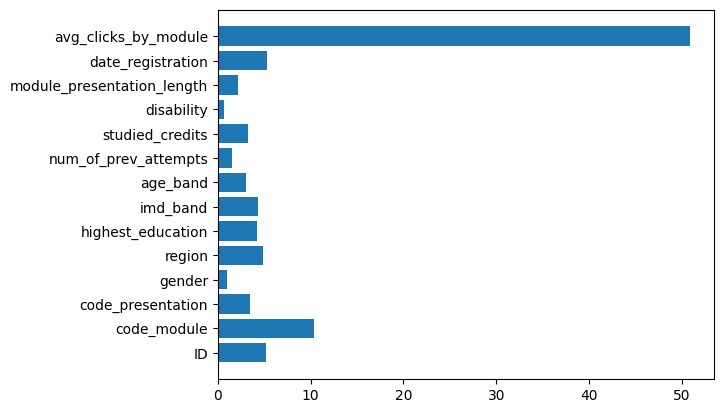

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state = SEED, test_size=0.18)

model = CatBoostClassifier(iterations=1000, random_seed=SEED, cat_features = df_cat, verbose = 200, learning_rate= 0.15)
model.fit(X_train, y_train, eval_set=(X_test, y_test))

print('Accuracy on test set:', round(model.score(X_test, y_test)*100, 2), '%')

importances = model.get_feature_importance()
names = data.columns
plt.barh(names, importances)
plt.show()

In [ ]:
predictions = model.predict(test)

In [ ]:
test['final_result'] = predictions
test[['ID','final_result']].to_csv('sub_1.csv', index = None)

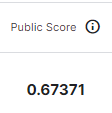